### Clustering della clientela di un centro commerciale
In questa esercitazione dovrai eseguire la segmentazione della clientela di un centro commerciale utilizzando il dataset che puoi trovare [qui](https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/mall_customers.csv).

Le informazioni di cui disponi sono:
 - **CustomerID**: codice identificativo del cliente.
 - **Gender**: sesso del cliente.
 - **Age**: età del cliente.
 - **Annual Income (k$)**: reddito annuo del cliente in 1000 dollari.
 - **Spending Score (1-100)**: punteggio assegnato al cliente in base alla spesa.


Per segmentare la clientela devi creare un modello di clustering utilizzando l'algoritmo kmeans, fanne più di uno, utilizzando le seguenti informazioni:
 1. Age e Spending Score
 2. Annual Income e Spending Score
 3. Age, Annual Income e Spending Score


Per ogni modello utilizza l'Elbow Method per determinare il numero di cluster e visualizza i cluster tramite uno scatterplot.<br/> Utilizza l'ultimo modello per associare questi clienti ad un cluster, esporta il risultato in un file EXCEL chiamato *mall_customers_prediction.xlsx* contentente due colonne:
 - **CustomerID**: il codice identificativo del cliente
 - **Customer Group**: il cluster di appartenenza

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (16,10)
sns.set_theme()

URL = "https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/"
data = pd.read_csv(URL + "mall_customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
#Function for plotting elbow
from sklearn.cluster import KMeans

def plot_elbow(k_max, X):
    wcss = {}
    
    for k in np.arange(2,k_max+1):
        model = KMeans(n_clusters = k, n_init='auto')
        model.fit(X)
        wcss[k] = model.inertia_
    plt.plot(list(wcss.keys()),list(wcss.values()),'-ob')
    plt.xticks(np.arange(2,k_max+1))
    plt.xlabel("K values")
    plt.ylabel("SSD")
    plt.title("Elbow method")
    plt.grid()
    plt.show()
    
    

In [3]:
X = data.drop("CustomerID", axis=1).values
X.shape

(200, 4)

C:\Users\aless\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aless\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aless\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aless\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

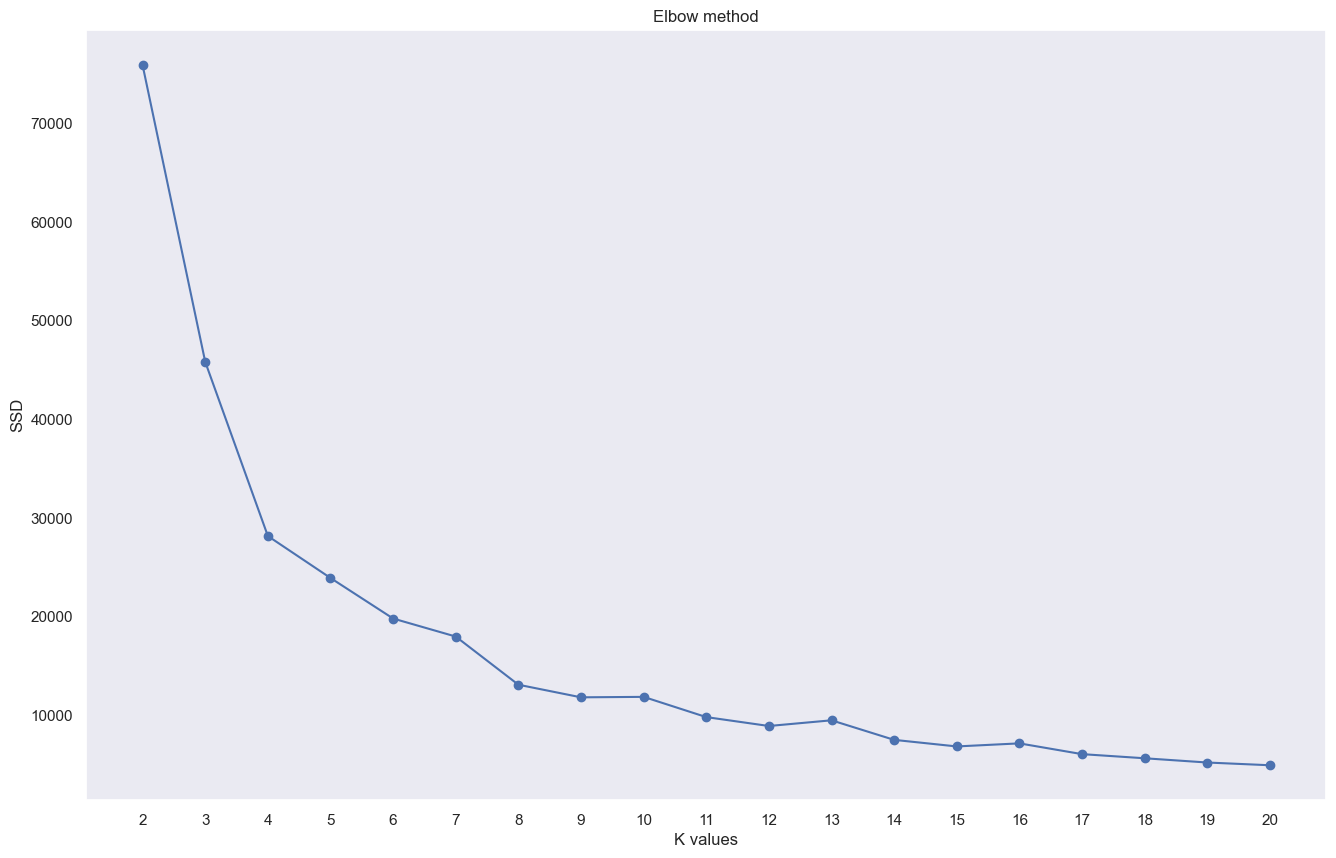

In [4]:
X1 = data[["Age","Spending Score (1-100)"]].values
plot_elbow(20, X1)

For first model, best k is 7 (8 should be good too)

In [5]:
def make_clusters(n_clusters, X, x_label="", y_label="", z_label=""):
    model = KMeans(n_clusters=n_clusters, n_init='auto')
    model.fit(X)
    y = model.predict(X)
    centers = model.cluster_centers_
    #for 3d case scatterplot3d required?
    if(X.shape[1] != 3):
        sns.scatterplot(x=X[:,0],y=X[:,1], hue=y, palette="Set1",s=100)
        plt.scatter(centers[:,0],centers[:,1],c='r',s=200, alpha=0.5)
        plt.grid()
        plt.title(f"k = {model.n_clusters} inertia = {model.inertia_:.3f}")
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.show()
    else:
        ax = plt.axes(projection ="3d")
        ax.scatter3D(X[:,0], X[:,1], X[:,2], edgecolors= "black", c=y, 
                     cmap="Set1")
        ax.scatter3D(centers[:,0], centers[:,1], centers[:,2], color="red", s=200)
        plt.title(f"k = {model.n_clusters} inertia = {model.inertia_:.3f}")
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_zlabel(z_label)
        plt.show()
    return model

C:\Users\aless\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


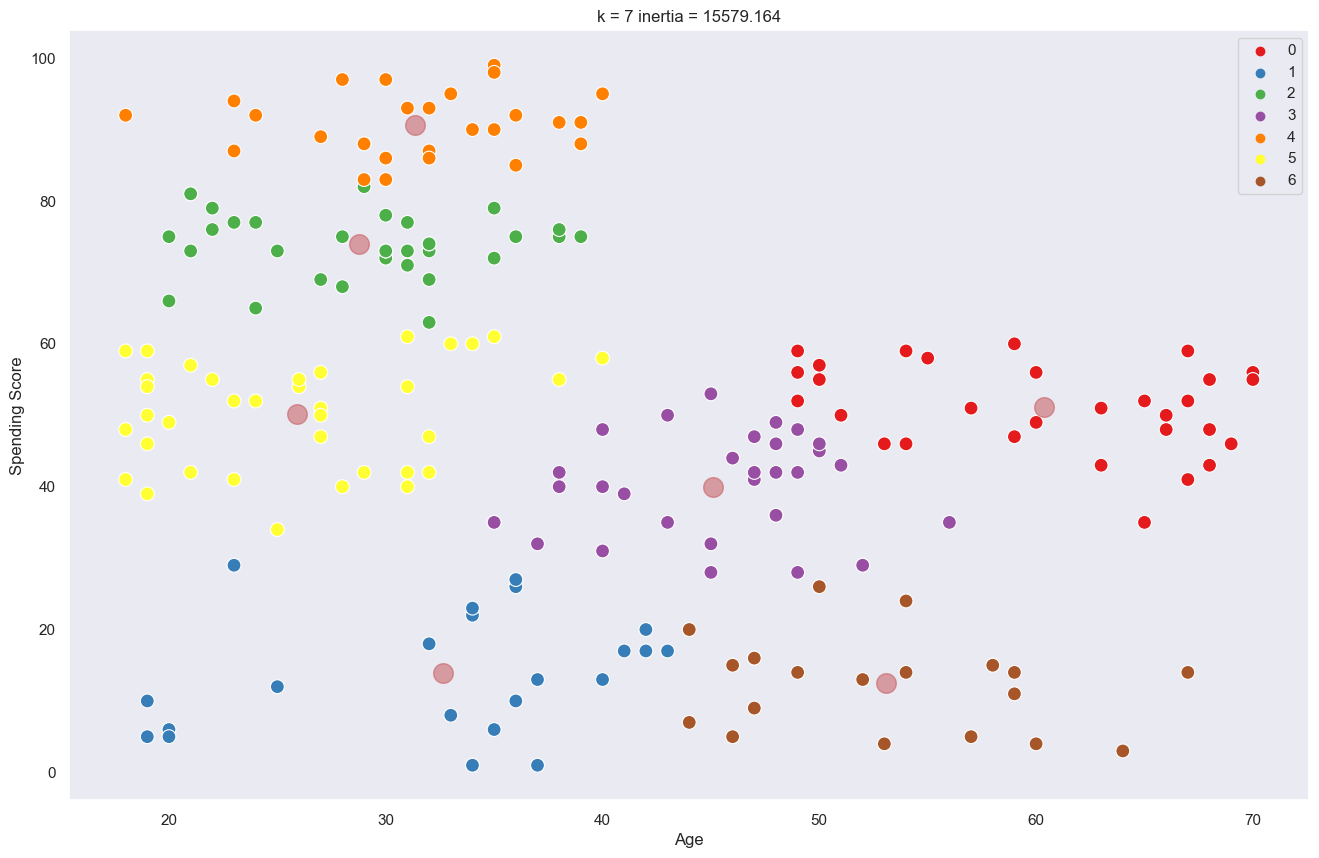

In [11]:
model1 = make_clusters(7, X1, "Age", "Spending Score")

C:\Users\aless\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aless\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aless\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aless\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

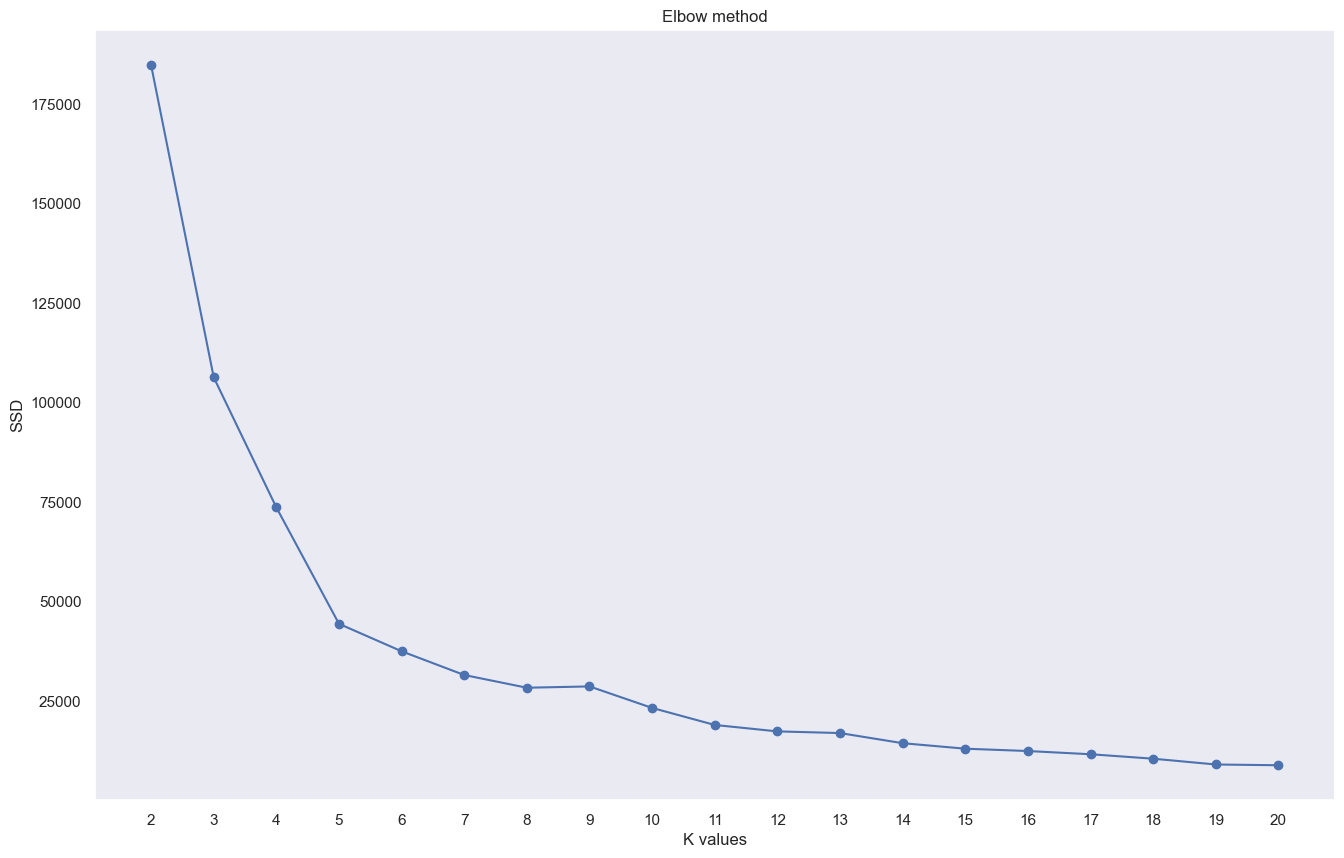

In [7]:
X2 = data[["Annual Income (k$)","Spending Score (1-100)"]].values
plot_elbow(20,X2)

For second model, best k is 6

C:\Users\aless\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


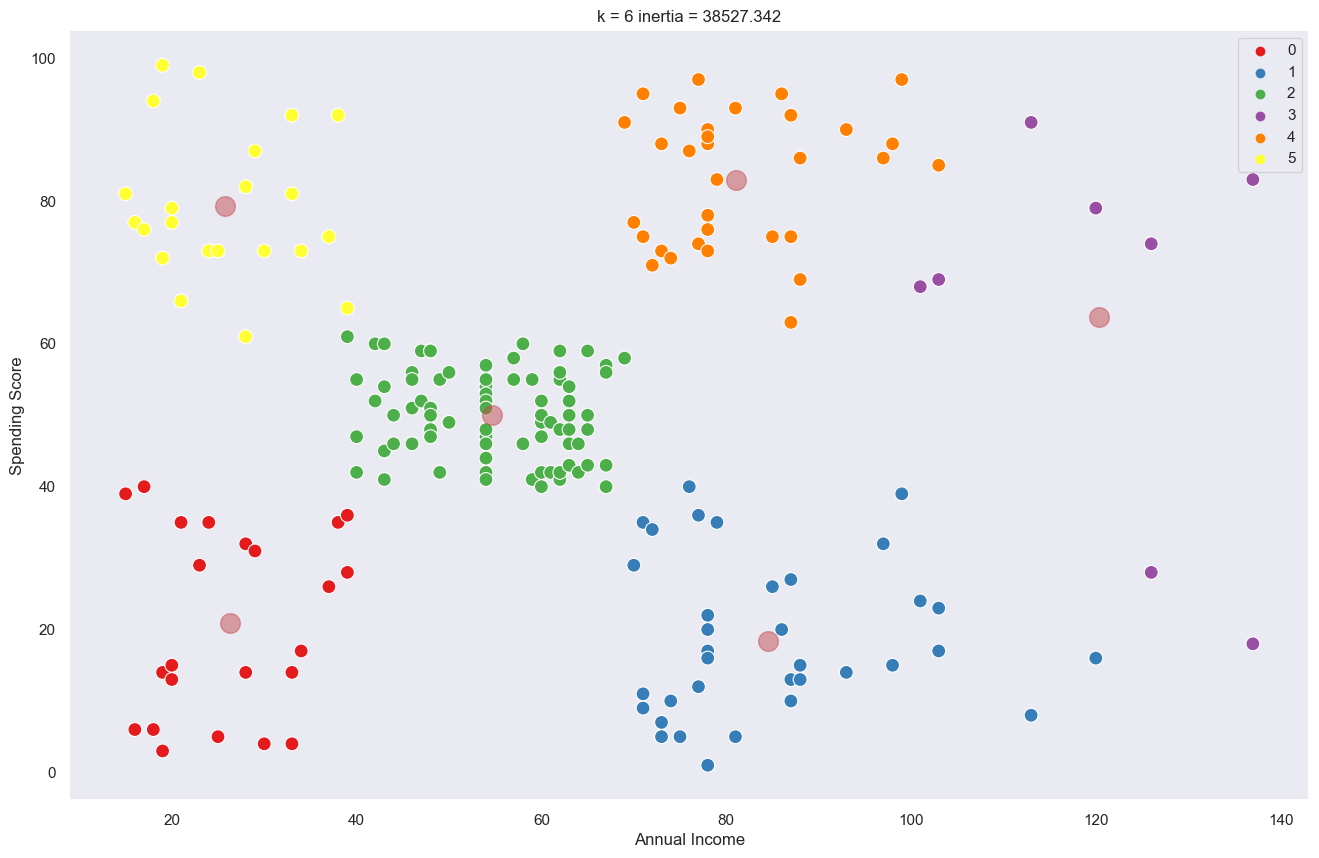

In [8]:
model2 = make_clusters(6, X2, "Annual Income", "Spending Score")

C:\Users\aless\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aless\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aless\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aless\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

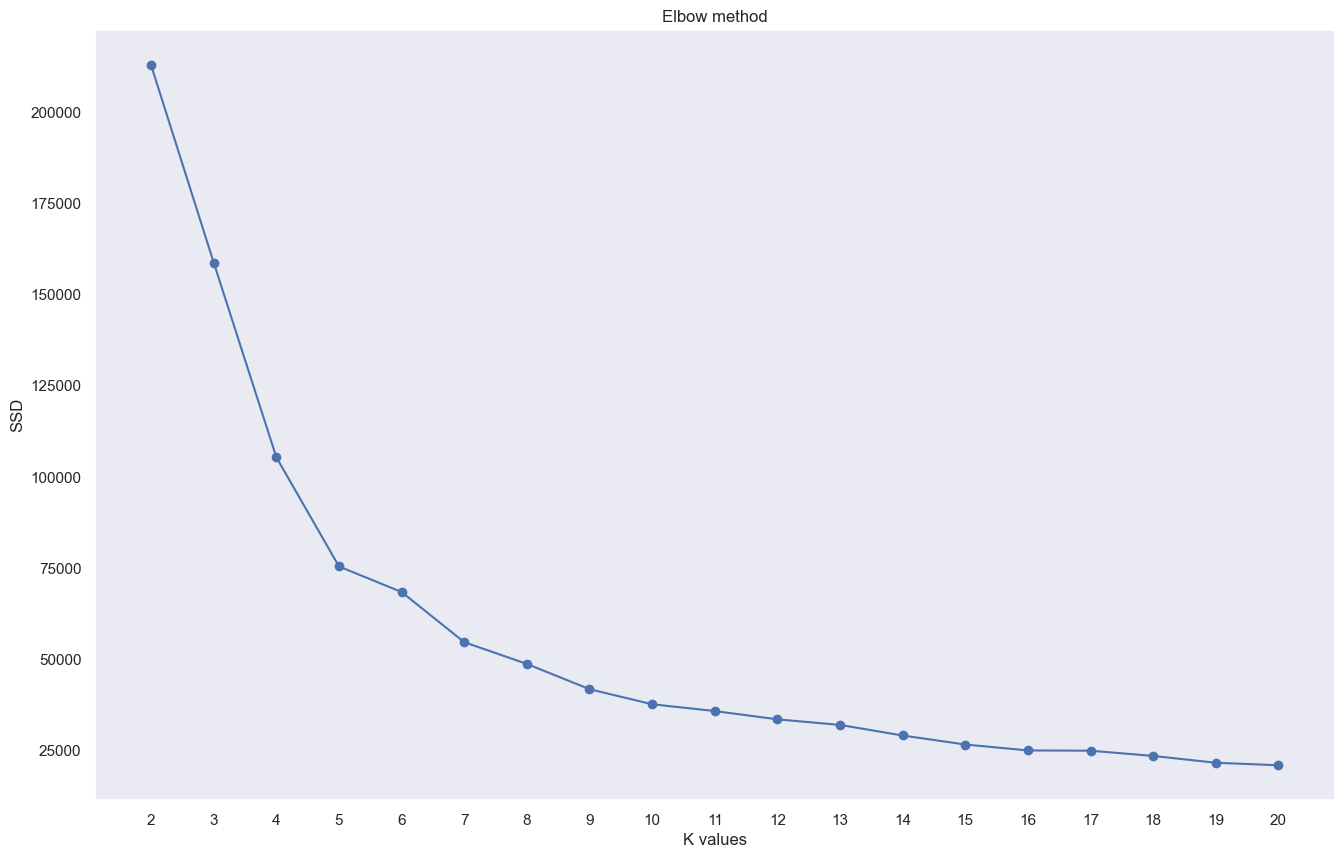

In [9]:
X3 = data[["Age","Annual Income (k$)","Spending Score (1-100)"]].values
plot_elbow(20,X3)

Best k = 6

C:\Users\aless\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


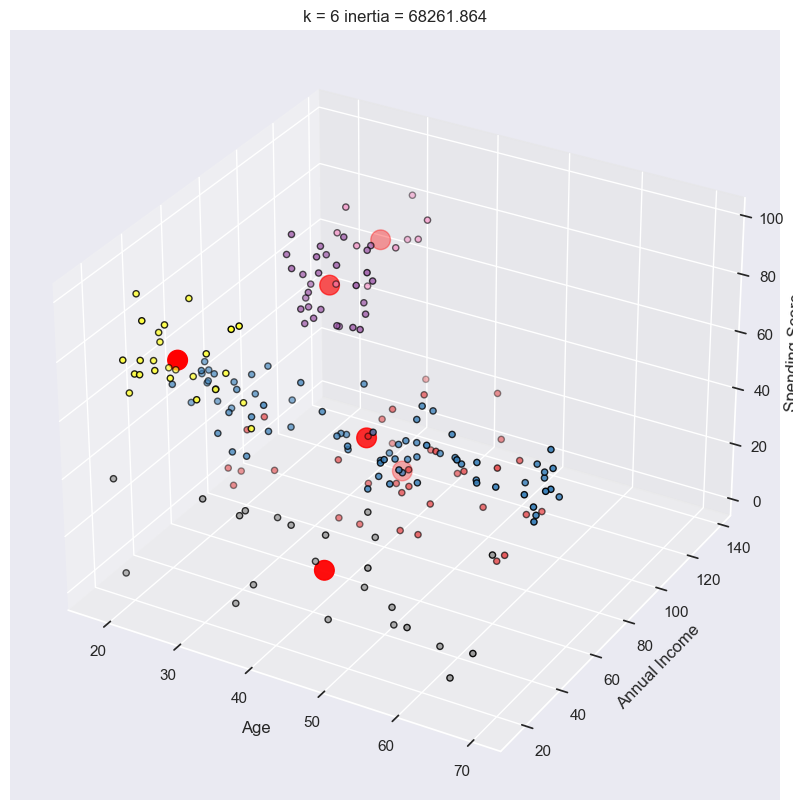

In [10]:
model3 = make_clusters(6, X3, "Age","Annual Income","Spending Score")

### New data clustering

In [13]:
df_pred = pd.read_csv(URL+"mall_customers_predict.csv")
df_pred.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,40,71,95
1,2,Male,36,87,10
2,3,Female,50,58,46
3,4,Male,47,71,9
4,5,Female,29,98,88


In [15]:
X_pred = df_pred[["Age","Annual Income (k$)","Spending Score (1-100)"]].values
y_pred = model3.predict(X_pred)

df_export = pd.DataFrame({
    "CustomerID": df_pred["CustomerID"].values,
    "Customer Group": y_pred
})

df_export.head()

,CustomerID,Customer Group
0,1,2
1,2,0
2,3,1
3,4,0
4,5,4


In [17]:
df_export.to_excel("es_1mall_customers_prediction.xlsx")